# Genetic algorithm 

## 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from operator import attrgetter

## 1.  read data in
- List of relative frequencies of techniques in X_small
- y_train to train the GA
- y_validation to later test the GA result

In [6]:
# read in excel with techniques and probabilities, sheet X removed latest 20%
X = pd.read_excel("../Data for algorithms.xlsx", sheet_name="X", index_col="ID")

# extract probabilities from excel and save as pd data frame
probs = pd.DataFrame(X.iloc[0])[1:]
probs

,prop
T1548.002,0.00517435
T1134,0.00179978
T1134.002,0.00179978
T1134.001,0.00179978
T1087.002,0.00269966
...,...
T1102.003,0.0015748
T1047,0.00494938
Unnamed: 194,0.00202475
Unnamed: 195,0.000899888


In [7]:
# read in excel with newest 20 percent of techniques for evaluation
y_train = pd.read_excel("../Data for algorithms.xlsx", sheet_name="Y", index_col="ID")
y_train = y_train.drop(y_train.tail(2).index, axis=0)
y_train = y_train.drop(['created'], axis = 1).T
y_train


ID,S0546,S0444,S0445,S0589,S0468,S0226,S0273,S0516,S0543,S0374,...,S0032,S0008,S0071,S0068,S0278,S0283,S0102,S0108,S0385,S0067
T1548.002,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1087.002,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# read correlation matrix
corr_mat = pd.read_excel("../Data for algorithms.xlsx", sheet_name="X_phi_techniques")
#corr_mat = corr_mat.drop('Unnamed: 0', 1)
corr_mat

,ID,T1548.002,T1134,T1134.002,T1134.001,T1087.002,T1087.003,T1087.001,T1071,T1071.004,...,T1078.003,T1125,T1497,T1497.001,T1497.003,T1102,T1102.002,T1102.001,T1102.003,T1047
0,T1548.002,1.000000,0.086130,0.345252,0.458399,0.150450,0.000000,0.144044,0.000000,0.0,...,0.000000,0.161746,0.000000,0.268135,0.000000,0.000000,0.000000,0.065356,0.000000,0.072361
1,T1134,0.086130,1.000000,0.249837,0.000000,0.184791,0.081205,0.288018,0.017377,0.0,...,0.114023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081205,0.126698
2,T1134.002,0.345252,0.249837,1.000000,0.249837,0.351560,0.081205,0.177114,0.017377,0.0,...,0.114023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081205,0.126698
3,T1134.001,0.458399,0.000000,0.249837,1.000000,0.000000,0.081205,0.032589,0.017377,0.0,...,0.114023,0.000000,0.000000,0.216579,0.000000,0.000000,0.000000,0.000000,0.081205,0.000000
4,T1087.002,0.150450,0.184791,0.351560,0.000000,1.000000,0.018546,0.459167,0.000000,0.0,...,0.067513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018546,0.381363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,T1102,0.000000,0.000000,0.000000,0.000000,0.000000,0.096488,0.000000,0.045497,0.0,...,0.128981,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.096488,0.000000
191,T1102.002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.070552,0.000000,0.000000,0.000000,0.000000,1.000000,0.210426,0.000000,0.000000
192,T1102.001,0.065356,0.000000,0.000000,0.000000,0.000000,0.067022,0.000000,0.000000,0.0,...,0.100884,0.000000,0.000000,0.194916,0.000000,0.000000,0.210426,1.000000,0.067022,0.000000
193,T1102.003,0.000000,0.081205,0.081205,0.081205,0.018546,0.160274,0.000000,0.113774,0.0,...,0.195911,0.000000,0.053115,0.000000,0.018546,0.096488,0.000000,0.067022,1.000000,0.000000


## 2. Create helper functions
- create_starting_population
- calculate_fitness
- select_individual_by_tournament
- select_individual_by_roulette
- breed_by_crossover_1point
- breed_by_crossover_2point
- breed_by_crossover_uniform
- randomly_mutate_population

In [5]:
# function to create a starting population by drawing zeros and ones randomly. Chance for ones is prob_of_ones
# individuals: int is number of individuals (=software) to be generated
# length_of_techniques: int
# percent_of_ones: float
def create_starting_population(individuals, length_of_techniques, prob_of_ones=0.04):
    #length_of_techniques = len(probs)
    size = (individuals, length_of_techniques)
    probability = np.array([ 1 - prob_of_ones, prob_of_ones])
    
    population = np.random.choice([0,1], size=size, p=probability)
    
    return population

In [6]:
#example starting population
#print (create_starting_population(6, len(probs)) )

In [200]:
# function to calculate fitness of every individual in the current population
def calculate_fitness(individuals, probs, corr_mat, lamda_balance = 0.2, bonus_factor = 135, penalty_factor = 12, print_out = False):
    
    len_pop = len(probs)
    
    individuals = np.array(individuals) # individuals = 6x269
    probs = np.array(probs) # array with probabilities
    ones = np.ones(len_pop) # number of ones 269x1
    
    occurrences = (individuals @ ones) # number of ones in individual 6x1
    P = individuals # 6x269
    
    corr = np.array(corr_mat).reshape(len_pop,len_pop)
    np.fill_diagonal(corr, 0) # 269x269, correlation matrix with 0 self covariance
    A = (P @ corr) # 6x269
    K = (P @ A.T) # 6x6
    corr_term = K.diagonal()/len_pop # diagonal elements of matrix K 

    
    prob_term = (individuals @ probs) # a includes values between 0 and 1
#     expected_techniques = np.rint(np.random.normal(11,1))
#     if expected_techniques < 0:
#         expected_techniques = 0
    difference = (np.subtract(occurrences, 12.0)) # here random N(11, 6)

    pen_1 = (difference**2) * np.sign(difference)/penalty_factor
    pen_1[pen_1 < 0] = 0
    
    pen_2 = np.copy(difference)/bonus_factor
    pen_2[pen_2 > 0] = 0
    penalty_term = (pen_1 + pen_2)
        
    if print_out:
        print("prob_term")
        print(prob_term)
        print("")
        print(occurrences)
        print("difference")
        print(difference)
        print("penalty_term")
        print(penalty_term)
        print("corr_term")
        print(corr_term)
        print("len_pop")
        print(len_pop)
        print("")
        
    fitness_scores = ((lamda_balance * prob_term.T + corr_term * (1-lamda_balance)) - penalty_term)
    return fitness_scores[0]

In [181]:
# testPop = create_starting_population(6, len(probs))
# print('Startpopulation')
# print(testPop)

# calculate_fitness(testPop, probs, corr_mat, print_out = True)

In [182]:
#function to select individuals by using tournament selection
def select_individual_by_tournament(population, scores):
    # get population size
    population_size = len(scores)

    # pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # get fitness score for each individual
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # identify undividual with highest fitness
    # fighter 1 will win if scores are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    #return the chromsome of the winner
    return population[winner, :]

In [183]:
#select_individual_by_tournament(testPop, calculate_fitness(testPop, probs, corr_mat))

In [249]:
# function to select individuals by using roulette wheel selection
# cannot be used yet, since it does not accept negative fitness values
# fitness value will represent the selection probability, which can't be negative
# idea1: normalise fitness values
# idea2: subtract the lowest (negative) value from all fitness values. The lowest fitness value is now zero.
def select_individual_by_roulette(population, k): # list of individuals to select from, number of individuals to select, attribute to use as selection criteria
    scores = calculate_fitness(population, probs, corr_mat)
    scores_normalized = scores -min(scores)
    scores_list = []
    for i in range(len(population)):
        fitness_sc = scores_normalized[i]
        scores_list.append((i, fitness_sc))
    scores_df = pd.DataFrame(scores_list, columns =["Index", "Fitness"])
    
    
    scores_df["Fitness"] = scores_df["Fitness"]/scores_df["Fitness"].sum()
#     index_score = scores_df["Fitness"].tolist().index(min(scores_df["Fitness"]))
#     scores_df["Fitness"][index_score] = 1-scores_df["Fitness"].sum()
#     print(1-scores_df["Fitness"].sum())
#     scores_df["Fitness"] = np.around(scores_df["Fitness"], 10 )
#     print(scores_df["Fitness"].sum())
    #if scores_df["Fitness"].sum() != 1.0:
        #print(scores_df["Fitness"])
    chosen = np.random.choice(scores_df["Index"], size = k, p = scores_df["Fitness"].fillna(0))
    winner1 = population[chosen[0], :]
    winner2 = population[chosen[1], :]

    return winner1, winner2

In [173]:
# function for executing one point crossover
def breed_by_crossover_1point(ind1, ind2):
    chromosome_length = min(len(ind1), len(ind2))
    crossover_point = random.randint(1, chromosome_length-1)
    
    ind1[crossover_point:], ind2[crossover_point:] = ind2[crossover_point:], ind1[crossover_point:]
    
    return ind1, ind2

In [174]:
# function for executin two point crossover
def breed_by_crossover_2point(ind1, ind2):
    chromosome_length = min(len(ind1), len(ind2))
    crossover_point1 = random.randint(1, chromosome_length)
    crossover_point2 = random.randint(1, chromosome_length-1)
    
    if crossover_point2 >= crossover_point1:
        crossover_point2 += 1
    else: # swapping the two crossover points
        crossover_point1, crossover_point2 = crossover_point2, crossover_point1
        
    ind1[crossover_point1: crossover_point2], ind2[crossover_point1: crossover_point2] \
        = ind2[crossover_point1: crossover_point2], ind1[crossover_point1: crossover_point2]
    
    return ind1, ind2

In [175]:
# function for executing uniform crossover
def breed_by_crossover_uniform(ind1, ind2, indpb):
    # parameter indpb is the indipendent probability for each bit to be exchanged
    # get length of chromosome
    chromosome_length = min(len(ind1), len(ind2))
    
    for i in range(chromosome_length):
        if random.random() < indpb: #add: lower probability that 0 --> 1 than the probability that 1 --> 0
             ind1[i], ind2[i] = ind2[i], ind1[i]
    return ind1, ind2

In [176]:
# function to mutate population
def randomly_mutate_population(population, mutation_probability):
    
    # apply random mutation
        random_mutation_array = np.random.random(
            size=(population.shape))
        
        random_mutation_boolean = \
            random_mutation_array <= mutation_probability

        population[random_mutation_boolean] = \
        np.logical_not(population[random_mutation_boolean])
        
        # return mutation population
        return population

In [177]:
import operator
# class to combine scores, occurrences and population
class result:
    def __init__(self, score, occurences, population):
        self.score = score
        self.occurences = occurences
        self.population = population

## 3. Run Genetic Algorithm

In [250]:
# main algorithm code
# set general parameters

# toDo, choose cross alogrithm
def run_ga(probs, corr_mat, population_size = 20, maximum_generation = 300, mutation_rate =0.001, print_out=False):
    chromosome_length = len(probs)
    best_score_progress = [] # tracks progress

    # create starting population
    population = create_starting_population(population_size, chromosome_length)

    # print (population)
    # display best score in starting population
    scores = calculate_fitness(population, probs, corr_mat)
    best_score = np.max(scores)

    if print_out:
        print ('Starting best score: %.1f' %best_score)

    # add starting best score to progress tracker
    best_score_progress.append(best_score)

    # going through the generations of genetic algorithm
    for generation in range(maximum_generation):
        # create an empty list for new population
        new_population = []

        # create new popualtion generating two children at a time
        for i in range(int(population_size/2)):
            #parent_1 = select_individual_by_tournament(population, scores)
            #parent_2 = select_individual_by_tournament(population, scores)
            parent1, parent2 = select_individual_by_roulette(population, 2)
            #child_1, child_2 = breed_by_crossover_1point(parent_1, parent_2)
            #child_1, child_2 = breed_by_crossover_2point(parent_1, parent_2) # Results are not as promising as with the others
            child_1, child_2 = breed_by_crossover_uniform(parent1, parent2, 0.5)
            new_population.append(child_1)
            new_population.append(child_2)

        # replace the old population with the new one
        population = np.array(new_population)

        # apply mutation
        population = randomly_mutate_population(population, mutation_rate)

        # score best solution, and add to tracker
        scores = calculate_fitness(population, probs, corr_mat)
        best_score = np.max(scores)
        best_score_progress.append(best_score)

        # print(best_score)

    # GA has completed required generation number

    ones = np.ones(len(probs)) # number of ones 269x1
    occurrences = (population @ ones)
    if print_out:
        print ('End best score %.1f' %best_score)
        print (occurrences)

        # plot progress
        %matplotlib inline
        plt.plot(best_score_progress)
        plt.xlabel('Generation')
        plt.ylabel('Best score (% target)')
        plt.show()
        
        # Print out information about best individuum
        print('Best score target generation: %.1f' %best_score)
        
    max_index_row = np.argmax(scores, axis=0)
    
    if print_out:
        print ('Position in Array:', max_index_row)
        print("Number of Ones:", occurrences[max_index_row])
        print("")
        print("Respective Chromosome:", population[max_index_row] )
        print("")

        print("Techniques used:")
        i = 0
        for row in probs.index: 
            if population [max_index_row][i] == 1:
                print(row)
            i+=1

    best_sw = np.tile(population[max_index_row],1) 
       
    
    
    # sort attribute scores in order to select best X individuums for evaluation
    results = []
    for i in range(0,len(scores)):
    #    print(i)
        r1 = result(scores[i], occurrences[i], population[i])
        results.append(r1)
 

    sorted_results = sorted(results, key=operator.attrgetter('score'))
    predi = sorted_results[-1]
    
    #print("predi")
    #print(predi)
    #print(type(predi))
    
    
    #return sorted_results, best_sw
    F1, softwareIndex, generatedSoftware = calculate_F_score(y_train, predi.population, do_print=False)
    return F1, softwareIndex, generatedSoftware

Starting best score: 0.1
End best score 0.1
[6. 7. 6. 7. 7. 6. 6. 7. 7. 6. 7. 7. 6. 6. 6. 6. 6. 7. 7. 6.]


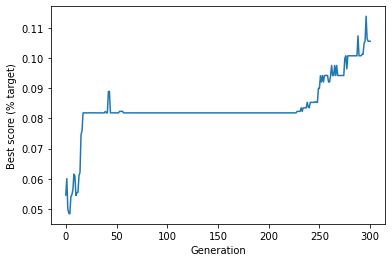

Best score target generation: 0.1
Position in Array: 0
Number of Ones: 6.0

Respective Chromosome: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]

Techniques used:
T1071.001
T1547.001
T1070.004
T1105
T1057
T1082


(0.5454545454545454,
 2,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]))

In [251]:
#sorted_results, best_sw = run_ga(probs, corr_mat, print_out=True)
run_ga(probs, corr_mat, print_out=True)

## 4. evaluate result of GA

In [51]:
# read in the y_train data set and the predicted software

def calculate_F_score(y_train: pd.DataFrame, predicted_sw: np.array, do_print=False):    
    #print(type(y_train), type(predicted_sw))
    assert y_train.shape[0] == predicted_sw.shape[0]
    
    ones = np.ones(len(y_train))

    occurences = np.array(predicted_sw).T @ ones
    
    F1_list = []
    Software_index = 0
    
    for software in y_train.columns:
        sum_s = y_train[software] @ predicted_sw

        precision = 0
        if occurences != 0:
            precision = sum_s/occurences
        
        number_of_techniques_y = y_train[software] @ ones
        recall = 0
        if number_of_techniques_y != 0:
            recall = sum_s/(number_of_techniques_y)
        F1 = 0
        if (precision + recall) != 0:
            F1 = 2 * precision* recall /(precision + recall)
            
        F1_list.append(F1)
    
    return max(F1_list), F1_list.index(max(F1_list)) ,predicted_sw

In [259]:
# calculate_F_score(y_train, sorted_results[0].population)

## 5. Helper functions optimizer

In [36]:
lamda_balance = 0.2 # 0 - 0.5
bonus_factor = 135 # +-20
penalty_factor = 12 #+- 5
population_size = 20 # ggf in kleinem Rahmen bewegen lassen
maximum_generation = 300, # würde ich fix setzen
mutation_rate =0.001 # to optimise
prob_of_ones=0.04 # mean of ones in X_small

startValues = [lamda_balance, bonus_factor, penalty_factor, mutation_rate, prob_of_ones]
startValues

[0.2, 135, 12, 0.001, 0.04]

In [37]:
lowerBound = [0.01, 115, 7, 0.0008, 0.03]
upperBound = [0.99, 155, 12, 0.0012, 0.05]

bounds = tuple((lowerBound[x], upperBound[x]) for x in range(0,len(startValues)))
bounds

((0.01, 0.99), (115, 155), (7, 12), (0.0008, 0.0012), (0.03, 0.05))

In [38]:
def GA_func(params):
    assert len(params) == 5
    lamda_balance = params[0]
    bonus_factor = params[1]
    penalty_factor = params[2]
    mutation_rate = params[3]
    prob_of_ones = params[4]
    # ein bester F1 score optimieren ist noch nicht finales Ziel
    F1, generated_software = run_ga(probs, corr_mat, population_size = 20, maximum_generation = 30, mutation_rate =mutation_rate, print_out=False)
    return F1

In [260]:
# GA_func(startValues)

## 6. Optimize hyper-parameter of model
#### 6.1 local optimizer "L-BFGS-B"

In [40]:
import scipy.optimize as sco
minimize = sco.minimize(GA_func, x0=startValues, bounds=bounds, method="L-BFGS-B", options={"gtol": 1e-12, "ftol":1e-12})
minimize.x

NameError: name 'best_sw' is not defined

#### 6.2 global optimizer

In [132]:
dual_annealing = sco.dual_annealing(GA_func, x0=startValues, bounds=bounds, seed=19937, maxiter=20)

In [133]:
dual_annealing.x

array([8.28652747e-01, 1.43817614e+02, 7.60972439e+00, 1.14277118e-03,
       4.97243779e-02])

In [139]:
GA_func(dual_annealing.x)

0.5

## 7.  Save series of generated softwares

In [252]:
examples_to_save = 10
df_to_save = pd.DataFrame([])
F1_values = pd.DataFrame([])
maxIndexValues = pd.DataFrame([])
for i in range(examples_to_save):
    F1, maxIndex, generated_software = run_ga(probs, corr_mat)
    
    df_to_save[f"software_{i}"] = generated_software
    print(F1)
    F1_values[f"software_{i}"] = np.array([F1])
    maxIndexValues[f"software_{i}"] = np.array([maxIndex])

maxIndexValues

0.5714285714285715
0.6666666666666666
0.5882352941176471
0.625
0.5384615384615384
0.5882352941176471
0.4444444444444445
0.5333333333333333
0.5454545454545454
0.5714285714285713


,software_0,software_1,software_2,software_3,software_4,software_5,software_6,software_7,software_8,software_9
0,81,2,67,90,84,67,40,67,10,11


In [174]:
F1_values

,software_0,software_1,software_2,software_3,software_4,software_5,software_6,software_7,software_8,software_9,software_10,software_11,software_12,software_13,software_14,software_15,software_16,software_17,software_18,software_19
0,0.6,0.769231,0.434783,0.571429,0.5,0.615385,0.571429,0.615385,0.666667,0.769231,0.615385,0.631579,0.615385,0.5,0.571429,0.736842,0.714286,0.615385,0.555556,0.615385


In [65]:
df_to_save.append(F1_values).append(maxIndexValues).to_excel('output3.xlsx', engine='xlsxwriter')

FileCreateError: [Errno 13] Permission denied: 'output3.xlsx'